# Purpose of the Code

The goal of this notebook is to extract the Maximum Voluntary Contraction (MVC) value from EMG signalrecorded from a specific muscle using external acquisition devices. The code processes the raw EMG data, identifies the segment corresponding to the peak muscle activation, and computes the maximum amplitude.

## Importing Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import sys
sys.path.append('../lib')
from import_emg_file import import_data_from_trigno
from trigno_utils import trigno_dataframe_edit, trigno_extract_muscle_emg
from emg_utils import plot_emg_signal, emg_filters, compute_MVC

## Loading Data Files

In [2]:
folder_path = '../data/_MVC/_test'
dataframes = import_data_from_trigno(folder_path)
dataframes = [trigno_dataframe_edit(df) for df in dataframes]

In [3]:
valid_muscles = ["Biceps", "Triceps", "Forearm1", "Forearm2"]
while True:
    muscle_name = input(f"Enter the name of the muscle (e.g., {', '.join(valid_muscles)}): ")
    if muscle_name in valid_muscles:
        break
    else:
        print("Invalid muscle name. Please enter one of the listed options.")

Enter the name of the muscle (e.g., Biceps, Triceps, Forearm1, Forearm2):  Biceps


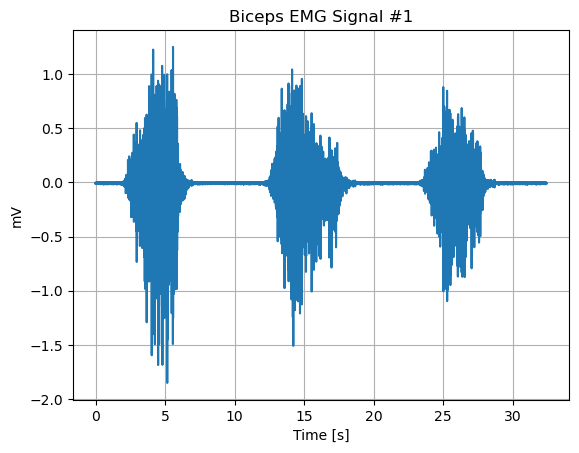

In [4]:
muscle_emg_raw, emg_time = trigno_extract_muscle_emg(dataframes, muscle_name)

## EMG Signal Analysis

In [5]:
Biceps_EMG_filtered, Biceps_EMG_rectified, Biceps_EMG_smoothed, _= emg_filters(Biceps_EMG_raw, EMG_Time, "biceps")
plot_emg_signal(Biceps_EMG_smoothed[0], EMG_Time[0], title=f"Biceps EMG Smoothed Signal #1")

NameError: name 'Biceps_EMG_raw' is not defined

## Compute MVC

In [ ]:
mvc = compute_MVC(Biceps_EMG_smoothed[0], 1/np.mean(np.diff(EMG_Time)))

## Export MVC

In [ ]:
mvc_dict = {muscle_name: mvc}
mvc_df = pd.DataFrame.from_dict(mvc_dict, orient='index', columns=['MVC'])
full_path = os.path.join('../data/_MVC', 'mvc_biceps.csv')
mvc_df.to_csv(full_path)
print(mvc_df)